### Logistic Regression 
: 선형방정식 을 사용해서 회귀란 단어가 있지만, 실질적으로는 분류(Classification)에 대한 확률을 계산하는 Model

그래프에서 선형방정식을 사용한 산에서 y값 보다 크면 true 작으면 false로 분류 하는방법

In [2]:
import pandas as pd
fish = pd.read_csv('../Data/fishes.csv')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [4]:
fish.Species.unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

# Feature n Target

In [5]:
# Feature
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_input[:5]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [6]:
# Target 
fish_target = fish['Species'].to_numpy()
fish_target[:5]

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream'], dtype=object)

# Train, Test
 

In [7]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

# 표준화

In [8]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input, train_target)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [10]:
# 잘 됬나 확인
train_scaled[:5]
test_scaled[:5]

array([[-0.88741352, -0.91804565, -1.03098914, -0.90464451, -0.80762518],
       [-1.06924656, -1.50842035, -1.54345461, -1.58849582, -1.93803151],
       [-0.54401367,  0.35641402,  0.30663259, -0.8135697 , -0.65388895],
       [-0.34698097, -0.23396068, -0.22320459, -0.11905019, -0.12233464],
       [-0.68475132, -0.51509149, -0.58801052, -0.8998784 , -0.50124996]])

---
### KNN을 이용한 확률 예측

In [11]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print('Train score :',kn.score(train_scaled, train_target))
print('Test score :',kn.score(test_scaled, test_target))

Train score : 0.8907563025210085
Test score : 0.85


In [15]:
# test data로 예측
print(kn.predict(test_scaled[:5]))
print(test_target[:5])

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']
['Perch' 'Smelt' 'Pike' 'Whitefish' 'Perch']


In [16]:
# test의 확률 예측값 보기
import numpy as np

In [17]:
proba = kn.predict_proba(test_scaled[:5])
np.round(proba, decimals=4) # 소수점 이하 4자리

array([[0.    , 0.    , 1.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 1.    , 0.    ],
       [0.    , 0.    , 0.    , 1.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ]])

In [18]:
# 그래서 저 위에꺼가 먼데?
kn.classes_
# 위에꺼가 이 순서대로 되어 있는거임 
# classes는 그냥 알파벳 순으로 나오는거고 
# 위에 꺼에서 가로 [] 에서 제일 높은숫자에 위치한 아래 이름들이 나오는거 

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

조금 더 디테일하게 나오는게 없을까?
---
## 로지스틱 회귀를 이용한 확률 예측
- 데이터의 각 컬럼을 새로운 변수로 사용하는 다중회귀를 이용한 확률
- 회귀식을 사용해서 로지스틱 회귀라고 하나 실질적으로 확률을 예측하는 모델
- 선형회귀식에서 출발하였고 딥러닝 모델의 기반임.

z = a * Weight + b * Length + c * Diagoanl + d * Width + e * Height + f  
위의 식을 이용하면 나오는 결과값은 -무한대 ~ +무한대의 범위로 결과 값이 출력된다.  
이를 해결하는 방법이 Sigmoid 함수를 사용한다.  

Sigmoid함수는 결과값이 0~1의 수만 출력하므로 0.5를 기준으로 양성(True)과 음성(False)로 분류가 가능하다.  
로지스틱 회귀를 사용할 경우는 Sigmoid함수를 로지스틱 함수라고 표현한다. 

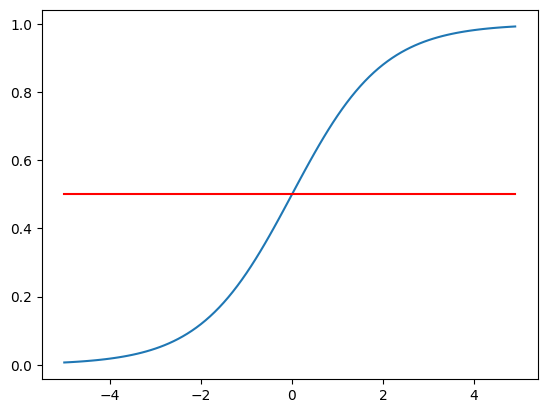

In [19]:
# Sigmoid Graph 출력해 보기

import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)
y = np.full((100, 1), 0.5) # 양성과 음성의 기준점
phi = 1 / (1 + np.exp(-z))

plt.plot(z, phi)
plt.plot(z, y, c="red") # y값 표현

plt.show()

---
### Logistic Regression으로 이진 분류 수행하기

In [22]:
# 2종류의 데이터만 발췌하기

bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]
print(train_bream_smelt[:5])
print(target_bream_smelt[:5])

[[ 0.91965782  0.60943175  0.81041221  1.85194896  1.00075672]
 [-1.0858536  -1.68646987 -1.70848587 -1.70159849 -2.0044758 ]
 [ 0.63818253  0.56257661  0.73223951  1.64473401  0.50705737]
 [ 0.30041219  0.23459067  0.42823457  1.36042157  0.22329758]
 [ 0.9027693   0.70314202  0.88858491  1.89027545  0.85537174]]
['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [23]:
# LR 실행하기
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [24]:
lr.predict(train_bream_smelt[:5])

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream'], dtype=object)

In [25]:
# 확률한번 봐보자
lr.predict_proba(train_bream_smelt[:5])

array([[0.99759855, 0.00240145],
       [0.02735183, 0.97264817],
       [0.99486072, 0.00513928],
       [0.98584202, 0.01415798],
       [0.99767269, 0.00232731]])

근데 저 확률이 진짜 맞어? sigmoid는 쓴건가?
---
### 확률 분포 검증

In [26]:
# 클래스 종류
lr.classes_

array(['Bream', 'Smelt'], dtype=object)

In [27]:
# 회귀식의 기울기(가중치) 확인하기
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [29]:
# 다중식으로 계산
decisions = lr.decision_function(train_bream_smelt[:5])
decisions

array([-6.02927744,  3.57123907, -5.26568906, -4.24321775, -6.0607117 ])

In [30]:
# Sigmoid 함수에 대입하여 확률값을 구한다.
from scipy.special import expit # <sigmoid 
print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


In [31]:
lr.predict_proba(train_bream_smelt[:5])

array([[0.99759855, 0.00240145],
       [0.02735183, 0.97264817],
       [0.99486072, 0.00513928],
       [0.98584202, 0.01415798],
       [0.99767269, 0.00232731]])

여기에서 오른쪽에 있는 값들이 나오면 sigmoid를 써서 잘 나왔다는 증거 


---
### Logistic Regression 다중 분류 수행하기

In [32]:
lr = LogisticRegression(C=20, max_iter=1000) # C는 규제 / C의 값을 적게 줄수록 규제를 강하게 준것, max_iter는 반복 Epoch 같은거
lr.fit(train_scaled, train_target)
print("Train :", lr.score(train_scaled, train_target))
print("Test :", lr.score(test_scaled, test_target))

Train : 0.9327731092436975
Test : 0.925


In [33]:
# test data로 예측
lr.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Roach', 'Perch'], dtype=object)

In [39]:
# test data로 확률
proba = lr.predict_proba(test_scaled[:5])
print(lr.classes_)
print('-'*50)
print(np.round(proba, decimals=3))

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
--------------------------------------------------
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [40]:
# 사용된 다중 공식 확인
print(lr.coef_, lr.intercept_)

[[-1.49002391 -1.02914546  2.59346952  7.70356904 -1.20069621]
 [ 0.19618433 -2.01066304 -3.77978384  6.50491084 -1.99483724]
 [ 3.56279446  6.34358274 -8.48971741 -5.75757091  3.79307809]
 [-0.10458082  3.60318722  3.93067712 -3.61735104 -1.75069837]
 [-1.40060956 -6.07503913  5.25968948 -0.87220842  1.86043583]
 [-1.38526622  1.49215352  1.39226801 -5.67733697 -4.40097069]
 [ 0.62150172 -2.32407585 -0.90660287  1.71598745  3.69368859]] [-0.09205115 -0.26290895  3.25101321 -0.14743216  2.65497795 -6.78782044
  1.38422153]


In [41]:
# 확률분포 검증
decisions = lr.decision_function(test_scaled[:5])
np.round(decisions, decimals=2)
# 여 까지는 수식에서 나온 값임 확률 아니라

array([[ -6.5 ,   1.03,   5.16,  -2.73,   3.34,   0.33,  -0.63],
       [-10.86,   1.93,   4.77,  -2.4 ,   2.98,   7.84,  -4.26],
       [ -4.34,  -6.23,   3.17,   6.49,   2.36,   2.42,  -3.87],
       [ -0.68,   0.45,   2.65,  -1.19,   3.26,  -5.75,   1.26],
       [ -6.4 ,  -1.99,   5.82,  -0.11,   3.5 ,  -0.11,  -0.71]])

계산할 항목이 여러개 이므로 이를 Sigmoid를 사용하면 각자의 값이 생성되어 확률이 1이 넘는 경우가 발생한다.
다중 항목인 경우에는 Softmax를 사용한다

In [42]:
from scipy.special import softmax
proba = softmax(decisions, axis = 1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
